# Proyecto Analisis de Datos
### Objetivo: 
Para el proyecto de análsis de datos comprendido en la estrategia evaluativa vamos a analizar los datos contenidos en el archivo csv anexo.

La primera columna del archivo representa el tiempo (t) y la segunda (x) y tercera (y) columnas son las medidas de algún experimento, ambas cantidades fueron tomadas por dos aparatos de medida.

Utilizando la técnica de ajuste de una función a unos datos con chi2: 
1. Trate de encontrar una función que describa x como función de t.
2. Trate de encontrar una función que describa y como función de t.
3. ¿Puede determinar si x y y están correlacionados? en otras palabras, ¿puede encontrar si x se puede expresar como función de y?

Recuerde justificar todas sus respuestas. El código desarrollado debe realizarse en Python.

### Elaborado por:
#### Lucas Quiceno.
#### Andres Betancur.

In [1]:
# Imoortando las librerias necesarias
%matplotlib inline
#import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from scipy.optimize import curve_fit
from IPython.html.widgets import interact


/home/lucas/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Se elabora un primer codigo con el fin de familiarizarse con las graficas interactivas, para esto se graficará la funcion

$y=Asin(\omega x)$

y con los parametros interactivos se modificaran los parametros de amplitud y frecuencia.

In [2]:
def func(freq,amp):
    x = np.linspace(0,3,200)
    z = amp*np.sin(freq*x)
    
    plt.plot(x,z,color='red')
    plt.ylim(-5,5)
    
interact(func,freq=(2*np.pi,2*np.pi*10),amp=(1,10))

interactive(children=(FloatSlider(value=34.55751918948772, description='freq', max=62.83185307179586, min=6.28…

<function __main__.func(freq, amp)>

Una vez familiarizados con la herramienta interactiva podemos empezar a elaborar un codigo para nuestro proposito

In [3]:
# Importa los datos experimentales
datos = np.loadtxt("data.csv",delimiter=",")

In [7]:
#se crean listas vacias y se llenan con los datos importados

t=[]
x=[]
y=[]

# se llenas las lista

for i in range(len(datos)):
    t.append(datos[i][0])
    x.append(datos[i][1])
    y.append(datos[i][2])
    
    
# Se propone un modelo para ajustar a los datos    
def modelo(A,B,C,D,E,F,G,H):
    X = np.linspace(0,5,2000)
    M = A*np.sin(B*X+C)*np.cos(D*X+E)+F*np.sin(G*X+H)
    
  #  plt.figure(figsize=(10,6))
    plt.grid()
    plt.title("y en función de t")
    plt.ylabel("Y")
    plt.xlabel("T")
    plt.plot(t,x, c='b')
    plt.plot(X,M,color='red')
    #plt.ylim(-15,15)
    #plt.legend()
    plt.show()

# Con ayuda de la libreria interact creamos un rango considerable en el cual se podra variar los parametros 
# de manera que obtengamos una primera aproximación a los datos experimentales
interact(modelo,A=(-5,100,0.05),B=(0,100,0.05),C=(0,100,0.05),D=(0,100,0.05),E=(0,100,0.05),F=(0,100,0.05),G=(0,100,0.05),H=(0,100,0.05))


interactive(children=(FloatSlider(value=47.0, description='A', min=-5.0, step=0.05), FloatSlider(value=50.0, d…

<function __main__.modelo(A, B, C, D, E, F, G, H)>

No handles with labels found to put in legend.


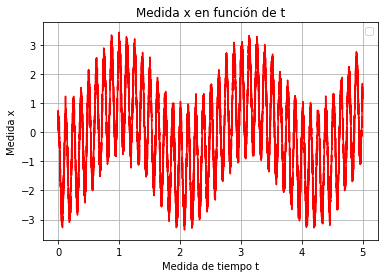

No handles with labels found to put in legend.


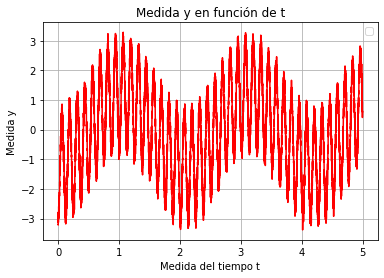

No handles with labels found to put in legend.


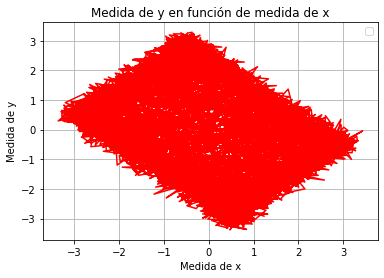

In [0]:
#primero se gráfican los datos para conocer la información con la que esta trabajando 
#grafica de x    

plt.figure()
plt.title("Medida x en función de t")
plt.grid()
plt.ylabel("Medida x")
plt.xlabel("Medida de tiempo t")
plt.plot(t,x, c='r')
plt.legend()
plt.show()

#grafica de y

plt.figure()
plt.title("Medida y en función de t")
plt.grid()
plt.ylabel("Medida y")
plt.xlabel("Medida del tiempo t")
plt.plot(t,y, c='r')
plt.legend()
plt.show()

# grafica x contra y

plt.figure()
plt.title("Medida de y en función de medida de x")
plt.grid()
plt.ylabel("Medida de y")
plt.xlabel("Medida de x")
plt.plot(x,y, c='r')
plt.legend()
plt.show()

Variando los distintos parametros se encuentra que los posibles parametros que se ajustan a la funcion modelo son
$A=2.65$
$B=23.45$
$C=77.10$
$D=26.45$
$E=9.70$
$F=0.85$
$G=49.55$
$H=6.15$

Entonces iniciamos la elaboracion de un codigo donde usaremos estos valores como puntos de referencia y se creará in intervalo que los incluya para elegir luego el conjunto de puntos que mejor se ajuste a los datos

[[2.64000000e+00 2.34400000e+01 7.70900000e+01 ... 4.95400000e+01
  6.14000000e+00 1.20019456e+04]
 [2.64000000e+00 2.34400000e+01 7.70900000e+01 ... 4.95400000e+01
  6.16000000e+00 1.27825745e+04]
 [2.64000000e+00 2.34400000e+01 7.70900000e+01 ... 4.95600000e+01
  6.14000000e+00 1.96139963e+04]
 ...
 [2.66000000e+00 2.34600000e+01 7.71100000e+01 ... 4.95400000e+01
  6.16000000e+00 1.38122611e+04]
 [2.66000000e+00 2.34600000e+01 7.71100000e+01 ... 4.95600000e+01
  6.14000000e+00 3.57309594e+04]
 [2.66000000e+00 2.34600000e+01 7.71100000e+01 ... 4.95600000e+01
  6.16000000e+00 1.86778534e+04]]
2.66
10000
10000


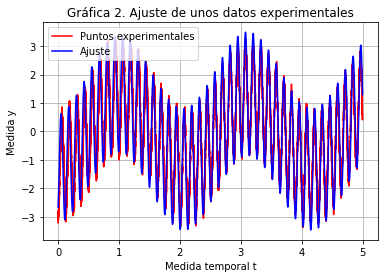

Los valores optimos son:
A = 2.66
B = 23.46
C = 77.09
D = 26.44
E = 9.69
F = 0.84
G = 49.56
H = 6.14
Chi = 10063.334818857831
El valor que da información sobre el ajuste es =  1.0063334818857832


In [0]:
u = 2 #variaciones en cada parámetro
N = 10000
xteo = np.zeros(N)
A = np.linspace(2.64,2.66,u) #variaciones en A
B = np.linspace(23.44,23.46,u) #variaciones en B
C = np.linspace(77.09,77.11,u) #variaciones en C
D = np.linspace(26.44,26.46,u) #variaciones en D
E = np.linspace(9.69,9.71,u) #variaciones en E
F = np.linspace(0.84,0.86,u) #variaciones en F
G = np.linspace(49.54,49.56,u) #variaciones en G
H = np.linspace(6.14,6.16,u) #variaciones en H
CHI = np.zeros((u**8,9),float) #para los cinco parametros y el valor de chi²
MIN=[] #para el minimo chi cuadrado

def f(X,A,B,C,D,E,F,G,H):#modelo téorico
    return A*np.sin(B*X+C)*np.cos(D*X+E)+F*np.sin(G*X+H)#Funcion a ajustar

c = 0 #contador
for j in range(u): #varia A
    for k in range(u): #varia B
        for l in range(u): #varia C
            for m in range(u): #varia D
                for n in range(u): #varia E
                    for o in range(u): #varia F
                        for p in range(u): #varia G
                            for q in range(u): #varia H
                                chi = 0.0 
                                for i in range(N): #Ciclo para calcular Chi²
                                    s = f(t[i],A[j],B[k],C[l],D[m],E[n],F[o],G[p],H[q]) #modelo 
                                    chi += pow((y[i]-s),2)/abs(s) #comparacion entre el modelo y los J experimental
                                CHI[c,0] = A[j] #guarda el valor de A
                                CHI[c,1] = B[k] #guarda el valor de B
                                CHI[c,2] = C[l] #guarda el valor de C
                                CHI[c,3] = D[m] #guarda el valor de D
                                CHI[c,4] = E[n] #guarda el valor de E
                                CHI[c,5] = F[o] #guarda el valor de F
                                CHI[c,6] = G[p] #guarda el valor de G
                                CHI[c,7] = H[q] #guarda el valor de H
                    
                                CHI[c,8] = chi #guarda el valor de chi
                                MIN.append(chi) #guarda el valor de chi para posteriormente elegir el minimo
                                c+=1
                                
print(CHI)
for i in range(u**8):
    if (CHI[i,8] == min(MIN)): #recorre el arreglo de los chi, y cuando i corresponde al optimo identifica los parametros
        #A,B,C,D valores óptimos
        A1 = CHI[i,0] #A
        B1 = CHI[i,1] #B
        C1 = CHI[i,2] #C
        D1 = CHI[i,3] #D
        E1 = CHI[i,4] #E
        F1 = CHI[i,5] #F
        G1 = CHI[i,6] #G
        H1 = CHI[i,7] #H
        I1 = CHI[i,8] #Chi
        print(CHI[i,0])

        
for i in range(N):
    xteo[i]=(f(t[i],A1,B1,C1,D1,E1,F1,G1,H1)) #para la grafica, el modelo con los parametros optimos
    
print(len(t))
print(len(xteo))

#detalles de la grafica
plt.figure()
plt.plot(t,y,color='r',label="Puntos experimentales")
plt.plot(t,xteo,color='b',label="Ajuste")
plt.legend()
plt.title("Gráfica 2. Ajuste de unos datos experimentales")
plt.xlabel("Medida temporal t")
plt.ylabel("Medida y")
plt.grid()
plt.show()

print("Los valores optimos son:")
print("A =",A1)
print("B =",B1)
print("C =",C1)
print("D =",D1)
print("E =",E1)
print("F =",F1)
print("G =",G1)
print("H =",H1)
print("Chi =",I1)


Resultado=I1/len(y) #hallar mejor valor
print("El valor que da información sobre el ajuste es = ", Resultado)

[[2.44000000e+00 2.32400000e+01 2.27900000e+01 ... 4.99400000e+01
  3.97400000e+01 2.00297826e+04]
 [2.44000000e+00 2.32400000e+01 2.27900000e+01 ... 4.99400000e+01
  3.97600000e+01 2.06294357e+04]
 [2.44000000e+00 2.32400000e+01 2.27900000e+01 ... 4.99600000e+01
  3.97400000e+01 2.77013395e+04]
 ...
 [2.46000000e+00 2.32600000e+01 2.28100000e+01 ... 4.99400000e+01
  3.97600000e+01 2.14070145e+04]
 [2.46000000e+00 2.32600000e+01 2.28100000e+01 ... 4.99600000e+01
  3.97400000e+01 2.11000271e+04]
 [2.46000000e+00 2.32600000e+01 2.28100000e+01 ... 4.99600000e+01
  3.97600000e+01 7.61032510e+04]]
2.46
10000
10000


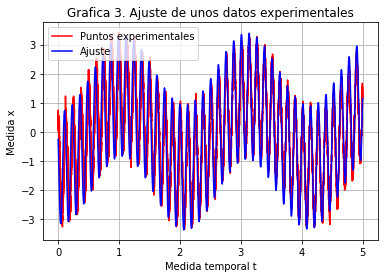

Los valores optimos son:
A = 2.46
B = 23.26
C = 22.79
D = 26.34
E = 17.94
F = 0.94
G = 49.94
H = 39.76
Chi = 18059.104800800957
El valor que da información sobre el ajuste es =  1.8059104800800956


In [0]:
u = 2 #variaciones en cada parámetro
N = 10000
yteo = np.zeros(N) #ajute para x
A = np.linspace(2.44,2.46,u) #variaciones en A
B = np.linspace(23.24,23.26,u) #variaciones en B
C = np.linspace(22.79,22.81,u) #variaciones en C
D = np.linspace(26.34,26.36,u) #variaciones en D
E = np.linspace(17.94,17.96,u) #variaciones en E
F = np.linspace(0.94,0.96,u) #variaciones en F
G = np.linspace(49.94,49.96,u) #variaciones en G
H = np.linspace(39.74,39.76,u) #variaciones en H
CHI = np.zeros((u**8,9),float) #para los cinco parametros y el valor de chi²
MIN=[] #para el minimo chi cuadrado


def f(X,A,B,C,D,E,F,G,H):#modelo téorico
    return A*np.sin(B*X+C)*np.cos(D*X+E)+F*np.sin(G*X+H)#Funcion a ajustar


c = 0 #contador
for j in range(u): #varia A
    for k in range(u): #varia B
        for l in range(u): #varia C
            for m in range(u): #varia D
                for n in range(u): #varia E
                    for o in range(u): #varia F
                        for p in range(u): #varia G
                            for q in range(u): #varia H
                                chi = 0.0 
                                for i in range(N): #Ciclo para calcular Chi²
                                    s = f(t[i],A[j],B[k],C[l],D[m],E[n],F[o],G[p],H[q]) #modelo 
                                    chi += pow((x[i]-s),2)/abs(s) #comparacion entre el modelo y los J experimental
                                CHI[c,0] = A[j] #guarda el valor de A
                                CHI[c,1] = B[k] #guarda el valor de B
                                CHI[c,2] = C[l] #guarda el valor de C
                                CHI[c,3] = D[m] #guarda el valor de D
                                CHI[c,4] = E[n] #guarda el valor de E
                                CHI[c,5] = F[o] #guarda el valor de F
                                CHI[c,6] = G[p] #guarda el valor de G
                                CHI[c,7] = H[q] #guarda el valor de H
                    
                                CHI[c,8] = chi #guarda el valor de chi
                                MIN.append(chi) #guarda el valor de chi para posteriormente elegir el minimo
                                c+=1


print(CHI)
for i in range(u**8):
    if (CHI[i,8] == min(MIN)): #recorre el arreglo de los chi, y cuando i corresponde al optimo identifica los parametros
        #A,B,C,D valores óptimos
        A1 = CHI[i,0] #A
        B1 = CHI[i,1] #B
        C1 = CHI[i,2] #C
        D1 = CHI[i,3] #D
        E1 = CHI[i,4] #E
        F1 = CHI[i,5] #F
        G1 = CHI[i,6] #G
        H1 = CHI[i,7] #H
        I1 = CHI[i,8] #Chi
        print(CHI[i,0])


for i in range(N):
    yteo[i]=(f(t[i],A1,B1,C1,D1,E1,F1,G1,H1)) #para la grafica, el modelo con los parametros optimos
    
print(len(t))
print(len(yteo))

#detalles de la grafica
plt.figure()
plt.plot(t,x,color='r',label="Puntos experimentales")
plt.plot(t,yteo,color='b',label="Ajuste")
plt.legend()
plt.title("Grafica 3. Ajuste de unos datos experimentales")
plt.xlabel("Medida temporal t")
plt.ylabel("Medida x")
plt.grid()
plt.show()

print("Los valores optimos son:")
print("A =",A1)
print("B =",B1)
print("C =",C1)
print("D =",D1)
print("E =",E1)
print("F =",F1)
print("G =",G1)
print("H =",H1)
print("Chi =",I1)


Resultado1=I1/len(x)
print("El valor que da información sobre el ajuste es = ", Resultado1)

Para determinar si las cantidades $x$ y $y$ están correlacionadas hacemos uso de la correlación lineal de Pearson

## $\rho = \frac{\sum_{i=1}^{n} ({x_{i} - \bar{x})(y_{i}-\bar{y})}}{\sqrt{\sum_{i=1}^{n} (x_{i}-\bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_{i}-\bar{y})^2}}$

mediante esta ecuación obtendremos un valor para $\rho$ entre-1 y 1

## $-1 \leq \rho \leq 1$

si $-1 \leq \rho \leq -0.5$ o $0.5 \leq \rho \leq 1$ indica que hay una correlacion negativa fuerte o positiva fuerte respectivamente

si $-0.5 \leq \rho \leq -0.3$ o $0.3 \leq \rho \leq 0.5$ indica que hay una correlacion negativa moderada o positiva fuerte respectivamente

si $-0.3 \leq \rho \leq -0.1$ o $0.1 \leq \rho \leq 0.3$ indica que hay una correlacion negativa débil o positiva debil respectivamente

si $-0.1 \leq \rho \leq 0$ o $0 \leq \rho \leq 0.1$ indica que no hay correlación o que es tan debil que consideramos que no se correlacionan



In [8]:
xbar=0.0
ybar=0.0
for i in range(len(x)):
    xbar=xbar+x[i] # Sumamos los datos  en la lista x
    ybar=ybar+y[i] # Sumamos los datos en la lista y
    
xpro=xbar/len(x) # Calculamos el promedio de los datos en x
ypro=ybar/len(y) # Calculamos el promedio de los datos en y

numerador=0.0
denominador1=0.0
denominador2=0.0
for i in range(len(x)):
    numerador= numerador+(x[i]-xpro)*(y[i]-ypro) # Calculamos el numerado
    denominador1=denominador1+(x[i]-xpro)**2 # Calculamos la primera sumatoria en el denominador
    denominador2=denominador2+(y[i]-ypro)**2 # # Calculamos la segunda sumatoria en el denominador

Ro=numerador/(pow(denominador1,0.5)*pow(denominador2,0.5)) # Encontramos el valor de Rho
print("El coeficiente de correlacion es: ", Ro)

El coeficiente de correlacion es:  -0.3346585500069031


El cual es un indicador de que hay una correlación debil entre las cantidades $x$ y $y$